- Principaux faits

Les maladies cardio-vasculaires sont la première cause de mortalité dans le monde(soit 31% de la mortalité mondiale totale)
Il meurt chaque année plus de personnes en raison de maladies cardio-vasculaires que de toute autre cause.

Il est possible de prévenir la plupart des maladies cardiovasculaires en s’attaquant aux facteurs de risque.

- Problématique :

Existe-t-il des facteurs de risque pour le développement de maladies cardiaques ?

In [1]:
#Importer les bibliothèques Python Pandas, Numpy, Seaborn et Matplotlib.pyplot.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lire le fichier resto.csv et le transformer en DataFrame 'df'
df = pd.read_csv('heart.csv')
#Afficher les 5 premières lignes
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Nous avons les données suivantes dans notre Dataset : 

-Âge: Âge lors de la crise cardiaque

-Sexe (1 = homme ; 0 = femme)

-CP (chest pain) : type de douleur thoracique (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

-TRESTBPS (The person's resting blood pressure) : pression artérielle au repos (en mm Hg à l'admission à l'hôpital)

-CHOL (cholesterol) : cholestérol sérique en mg/dl

-FBS (The person's fasting blood sugar) : (glycémie à jeun > 120 mg/dl) (1 = vrai ; 0 = faux)

-RESTECH (Resting electrocardiographic measurement) : résultats électrocardiographiques au repos (Normal: Normale, ST: Ondes ST-T abnormales (Invesions onde T et/ou augmentaion ou réduction de > 0.05 mV des ondes ST)

-THALACH( The person's maximum heart rate achieve) : fréquence cardiaque maximale atteinte
EXANG Exercise induced angina : (angine de poitrine induite par l'exercice (1 = oui ; 0 = non) désigne une douleur thoracique qui apparaît généralement pendant un effort ou un stress)


-THAL (Un trouble sanguin appelé thalassémie) : (0=null , 1 = normal ; 2 = défaut fixe ; 3 = défaut réversible)
        - Value 0: NULL
        - Value 1: fixed defect (no blood flow in some part of the heart)
        - Value 2: normal blood flow
        - Value 3: reversible defect (a blood flow is observed but it is not normal)
        
-TARGET (1 ou 0) Heart disease (0 = no, 1 = yes) : Si le patient avait une maladie cardiaque (1: Oui, 0: Non)

-OLDPEAK (dépression ST induite par l'exercice par rapport au repos)ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

-SLOPE (la pente du segment ST de pointe à l'effort) the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

-CA (nombre de vaisseaux principaux (0-3) colorés par flourosopie) The number of major vessels



Remarque :La crise cardiaque : désigne la destruction d'une partie du muscle cardiaque. Il se manifeste par une douleur dans la poitrine et peut provoquer l'arrêt du cœur. Une prise en charge rapide de l'infarctus du myocarde permet de limiter les séquelles

In [3]:
#Les statistiques descriptives 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Obsérvation:
1. L'âge moyen est de 54 ans et l'âge minimum est de 29 ans. 
2. La tension artérielle moyenne au repos est de 131 et sa valeur maximale est de 200.
3. Le taux de cholestérol moyen est de 126 et la valeur maximale est de 564 (ceci peut être un point aberrant).
4. La fréquence cardiaque moyenne est de 149 (normale pendant l'exercice) et la valeur maximale est de 200 (discutable).


In [4]:
#les variables qui composent le DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Toutes nos variables, sauf oldpeak, sont de type entier

In [5]:
#Le nombre de lignes et de colonnes dans le DataFrame
df.shape

(1025, 14)

cela signifie que le fichier "heart.csv" contient 1025 lignes et 14 colonnes.

In [6]:
#les colonnes 
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
#Les valeurs manquantes
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Il n'y a pas de valeurs manquantes dans nos données.

In [8]:
#Trouver et supprimer les lignes dupliquées de DataFrame
df =df.drop_duplicates()
df.shape

(302, 14)

Créons à présent quelques visuels de nos données.

In [9]:
#cas malades et non malades
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

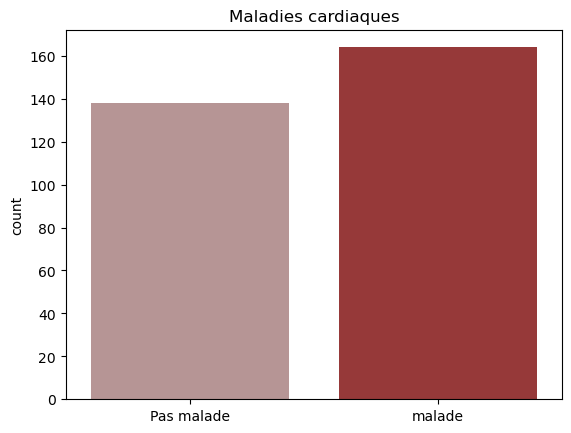

In [10]:
f =sns.countplot(x='target', data=df,palette=['#BC8F8F',"#A52A2A"])
f.set_title("Maladies cardiaques")
f.set_xticklabels(['Pas malade','malade'])
plt.xlabel("")
plt.show()

Nombre de patients sans maladie cardiaque (target = 0) = Nombre de patients avec maladie cardiaque (target = 1)

==> Les données sont équilibrées


In [25]:
# determiner les variable continues et les variables categoriques
continues = df[['age','trestbps','chol','thalach']] 
categorique = df[['sex','cp','fbs','restecg']]

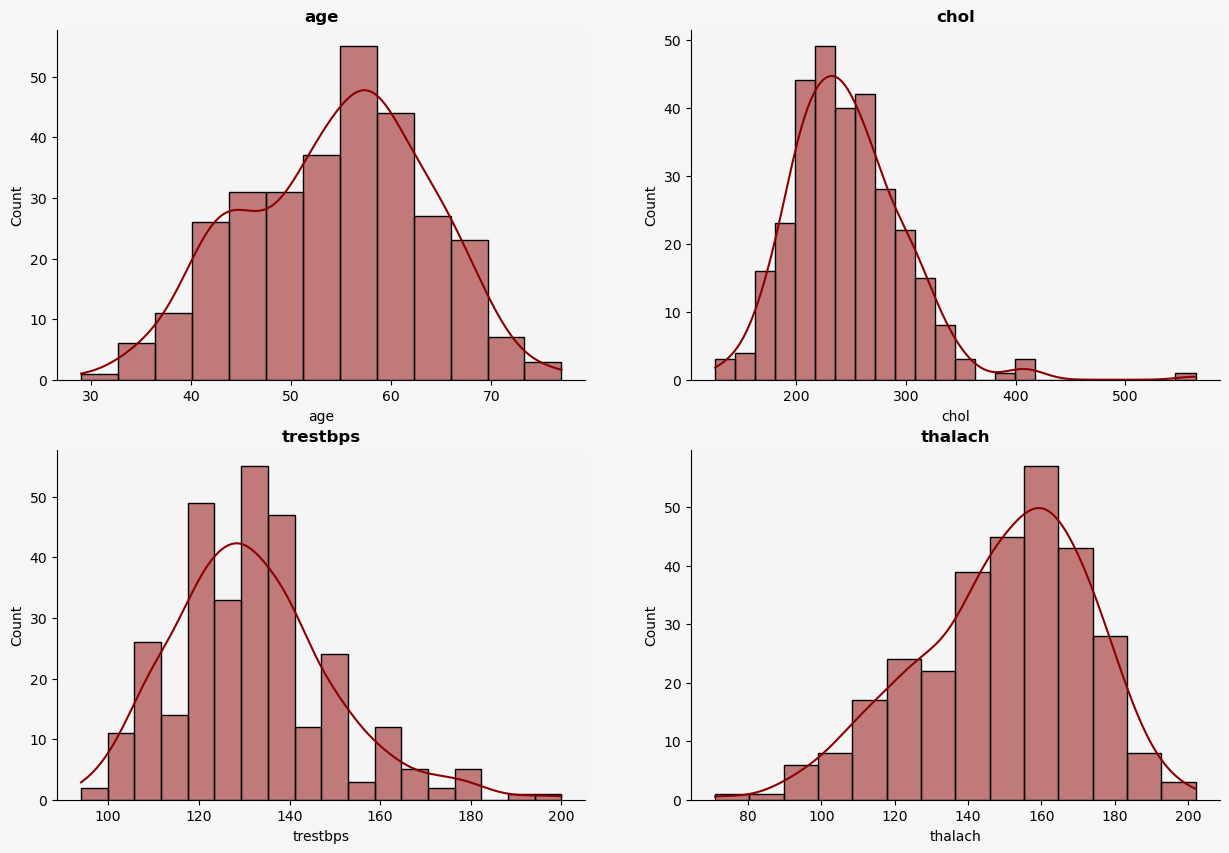

In [26]:
#les variables continues :
fig,ax = plt.subplots(2, 2, figsize=(15, 10))
fig.patch.set_facecolor('#f6f5f7')

for i, index in enumerate(continues.columns):
    sns.histplot(ax=ax[i%2, i//2], x=continues[index], color='darkred', kde=True, alpha=0.5)
    ax[i%2, i//2].set_title(index, fontweight='bold')
    ax[i%2, i//2].set_facecolor('#f6f5f5')
    for z in ["top", "right"]:
        ax[i%2, i//2].spines[z].set_visible(False)

plt.show()

Les graphiques montrent que la distribution des valeurs pour chaque variable est différente.
1. l'age de la majorité des patients est compris entre 50 et 60 ans.
2. la tension artérielle au repos (trestbps) est principalement concentrée autour de 120-140 mm Hg ( millimètres de mercure)
3.  le taux de cholestérol (chol) est principalement concentré autour de 200-300 mg/dl
4.  la fréquence cardiaque maximale atteinte (thalach) est principalement concentrée autour de 140-160 battements par minute.

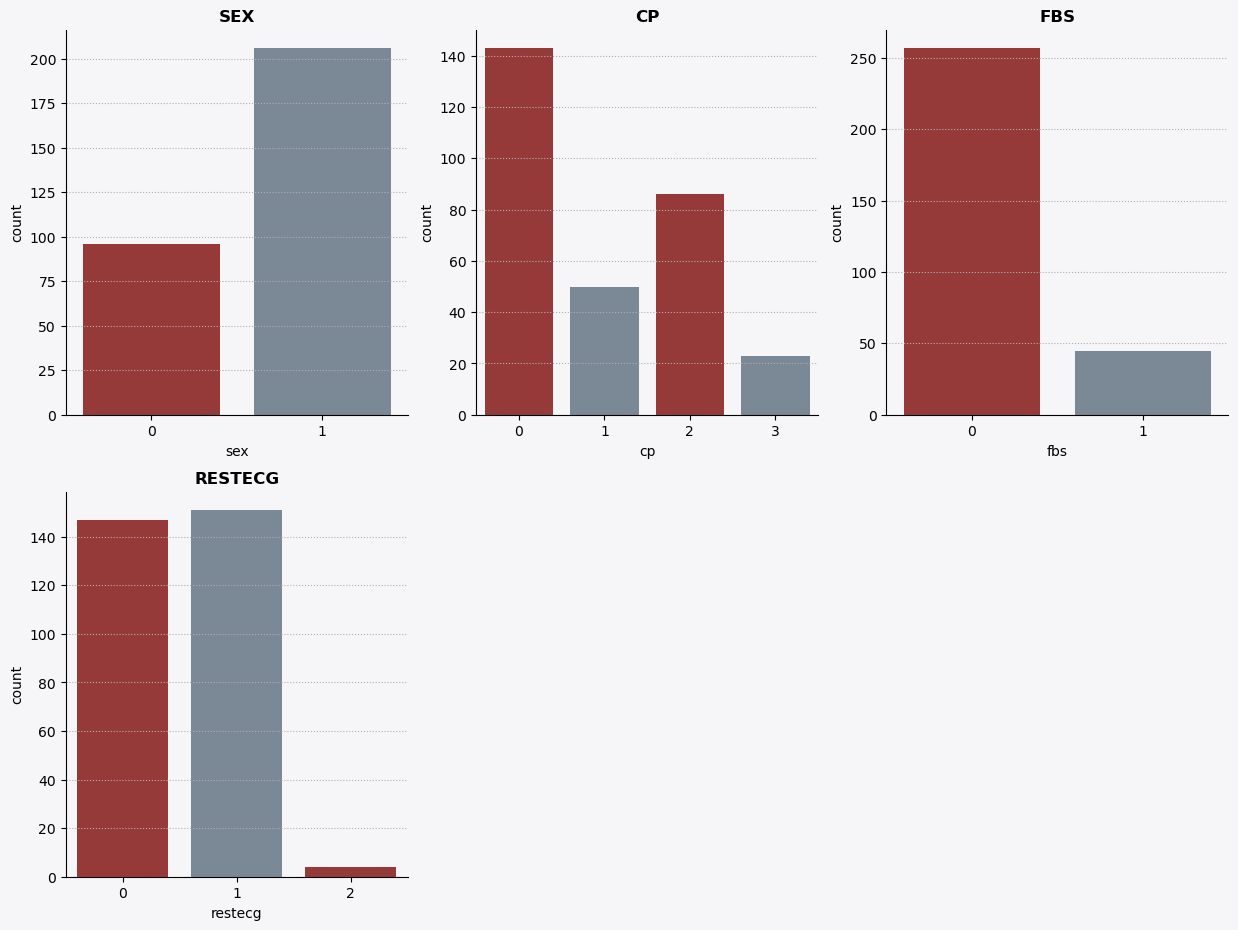

In [27]:
#les variables categorique :

colors=['brown','lightslategrey']
fig=plt.figure(figsize=(15,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(categorique.columns):
    ax=plt.subplot(4,3,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(categorique[val],palette=colors)

##  'sex' et 'traget'

In [14]:
# 0 = femme, 1= homme 
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

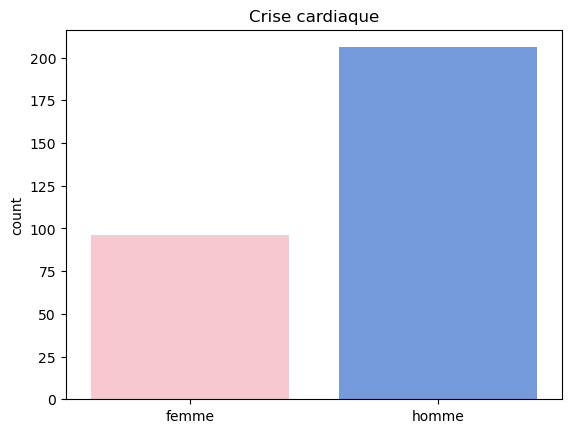

In [15]:
f = sns.countplot(x='sex',data=df,palette=['#FFC0CB',"#6495ED"])
f.set_title("Crise cardiaque")
f.set_xticklabels(['femme','homme'])
plt.xlabel("")
plt.show()

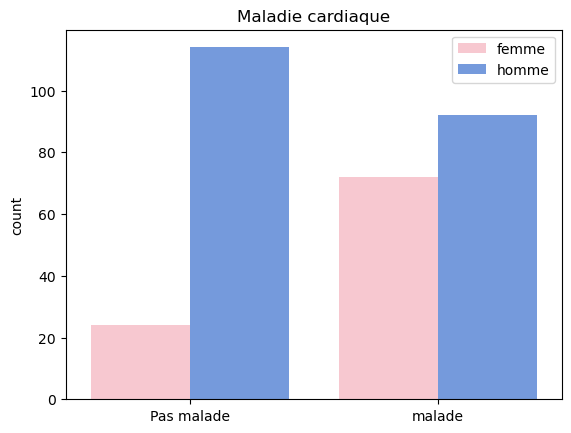

In [16]:
f = sns.countplot(x='target',data=df,hue='sex', palette=['#FFC0CB',"#6495ED"])
f.set_title("Maladie cardiaque")
plt.legend(['femme','homme'])
f.set_xticklabels(['Pas malade','malade'])
plt.xlabel("")
plt.show()

##  'age' et 'target

Passons maintenant à la distribution de nos données conditionnée par l'âge

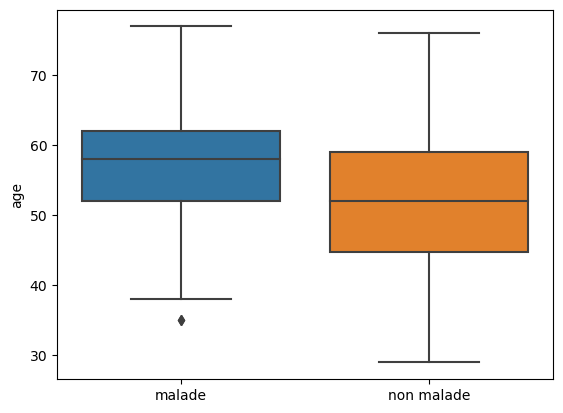

In [17]:
f =sns.boxplot(data=df, y="age",x ="target")
f.set_xticklabels(['malade','non malade'])
plt.xlabel("")
plt.show()

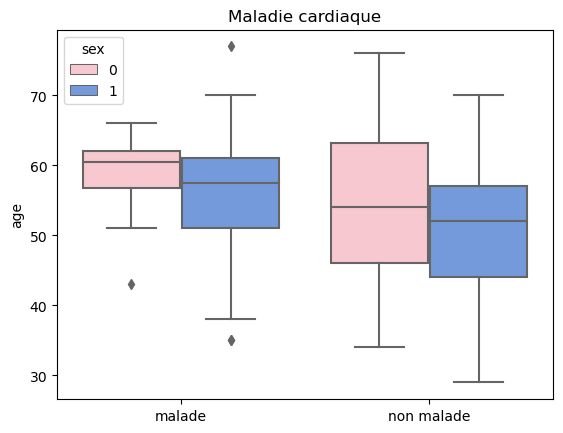

In [18]:
f =sns.boxplot(data=df, y="age",x ="target",hue='sex', palette=['#FFC0CB',"#6495ED"])
f.set_xticklabels(['malade','non malade'])
f.set_title("Maladie cardiaque")
plt.xlabel("")
plt.show()

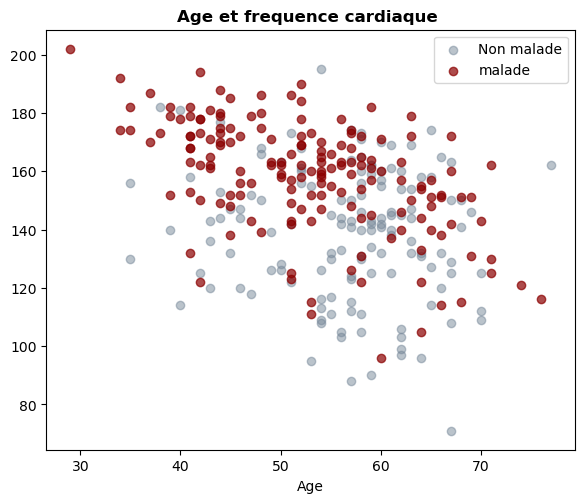

In [19]:
# Relation entre age et frequence cardiaque
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(gs[0,0])
ax0.scatter(x='age',y='thalach',data=df[df['target']==0],alpha=0.5,color='lightslategrey',label = 'Non malade')
ax0.scatter(x='age',y='thalach',data=df[df['target']==1],color='darkred',alpha=0.7,label = 'malade')
ax0.legend()
ax0.set_xlabel('Age')
ax0.set_title('Age et frequence cardiaque ',fontweight='bold')
plt.show()

Il y a une corrélation négative significative entre l'âge et la fréquence cardiaque maximale (FCM), ce qui signifie que la FCM diminue généralement avec l'âge. 
Cela est dû en partie à une diminution de la fonction cardiovasculaire et de la capacité du cœur à pomper le sang.

l'âge est un facteur de risque important pour les maladies cardiaques

##  (Cholesterol, Glycemie à jeun,pression arterieelle) et 'target'

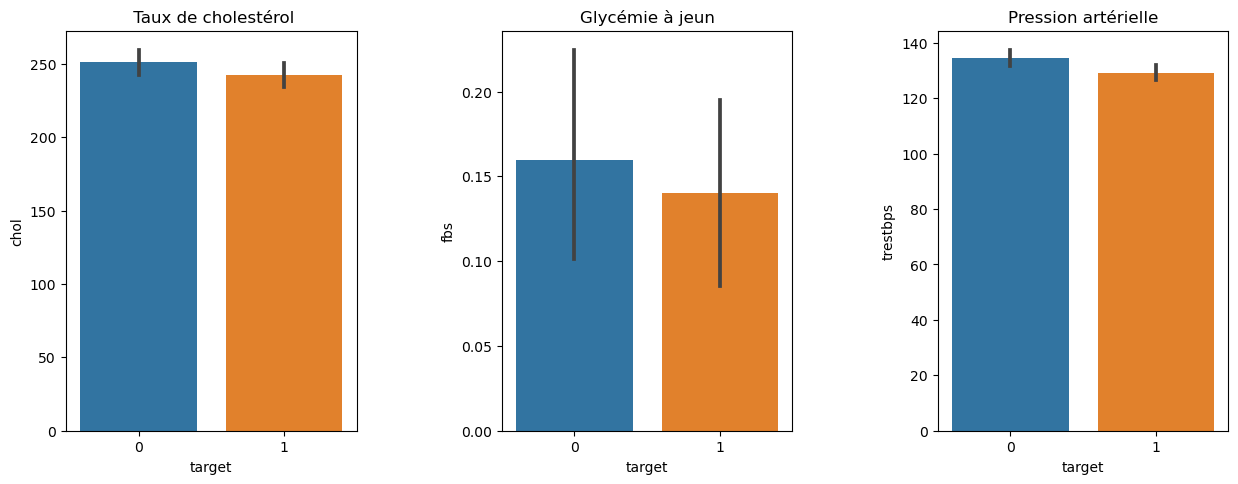

In [20]:
# Relation entre target et (chol,glycemie,pression)
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title(' Taux de cholestérol')
sns.barplot(x="target", y="chol", data=df)
plt.subplot(132)
plt.title('Glycémie à jeun')
sns.barplot(x="target", y="fbs", data=df)
plt.subplot(133)
plt.title('Pression artérielle')
sns.barplot(x="target", y="trestbps", data=df)
plt.show()

- La concentration en cholestérol (variable chol) dans le sang des malades cardiaques est lègèrement supérieure à celle supérieure à celle des non-malades. On peut dire que le taux de cholestérol n’est pas tellement un paramètre propre aux maladies cardiaques.
- On peut dire que la glycemie a jeun n'est pas un parametre propre au maladies cardiaques.
 
- La pression artérielle au repos (variable trestbps) est quasiment la même aussi bien chez les malades cardiaques que chez les non malades.


## La fréquence cardiaque maximale et 'target'

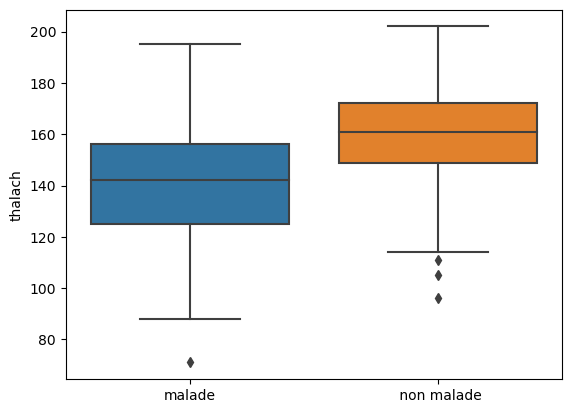

In [21]:
f =sns.boxplot(data=df, y="thalach",x ="target")
f.set_xticklabels(['malade',' non malade'])
plt.xlabel("")
plt.show()

Les boîtes à moustaches montrent que l’exercice physique est aussi un facteur de survenue d’une maladie cardiaque. En effet, la fréquence maximale atteinte par les non-malades est supérieure à celle atteinte par les malades. Donc les malades cardiaques doivent faire attention pendant toutes activités sportives où le rythme cardiaque s’accélère.

## douleur thoracique et 'target'

<function matplotlib.pyplot.show(close=None, block=None)>

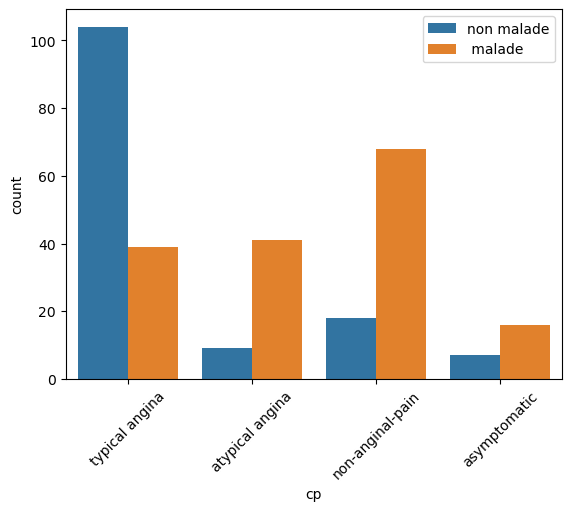

In [22]:
#douleur thoracique cp :
sns.countplot(x="cp",hue="target",data=df)
plt.xticks([0,1,2,3],["typical angina", "atypical angina","non-anginal-pain", "asymptomatic"], rotation = 45)
plt.legend(labels = ['non malade',' malade'])
plt.show



Ce graphique permet de visualiser la distribution des différents types de douleurs thoraciques ("typical angina", "atypical angina", "non-anginal-pain" et "asymptomatic") en fonction du fait qu'un patient soit atteint ou non d'une maladie cardiaque. 
On peut observer que le type de douleur "non-anginal-pain" est le plus souvent associé à une maladie cardiaque.


non-anginal-pain : Leurs symptômes peuvent comprendre un essoufflement; une pression ou une douleur à la mâchoire, dans le haut du dos, dans la partie inférieure du thorax ou dans la partie supérieure de l'abdomen; des étourdissements ou un évanouissement,maladies degestif, ou encore une fatigue extrême.


## Resultats electrocardiographique au repos et 'target'

<function matplotlib.pyplot.show(close=None, block=None)>

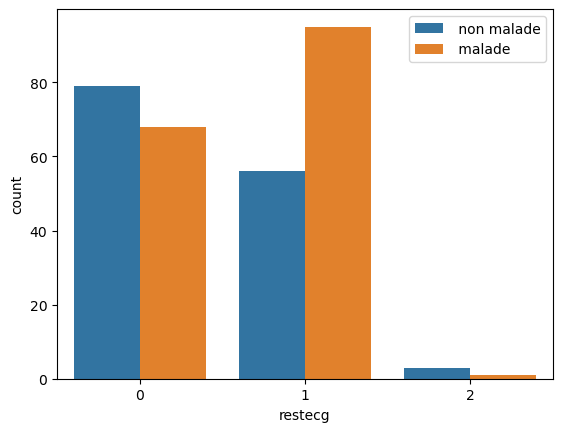

In [23]:
sns.countplot(x="restecg",hue="target",data=df)
plt.legend(labels = [' non malade',' malade'])
plt.show

La variable restecg désigne la mesure électrocardiographique au repos (0 = normale, 1 = présentant une anomalie de l’onde ST-T, 2 = montrant une hypertrophie ventriculaire gauche probable ou définitive selon les critères d’Estes)

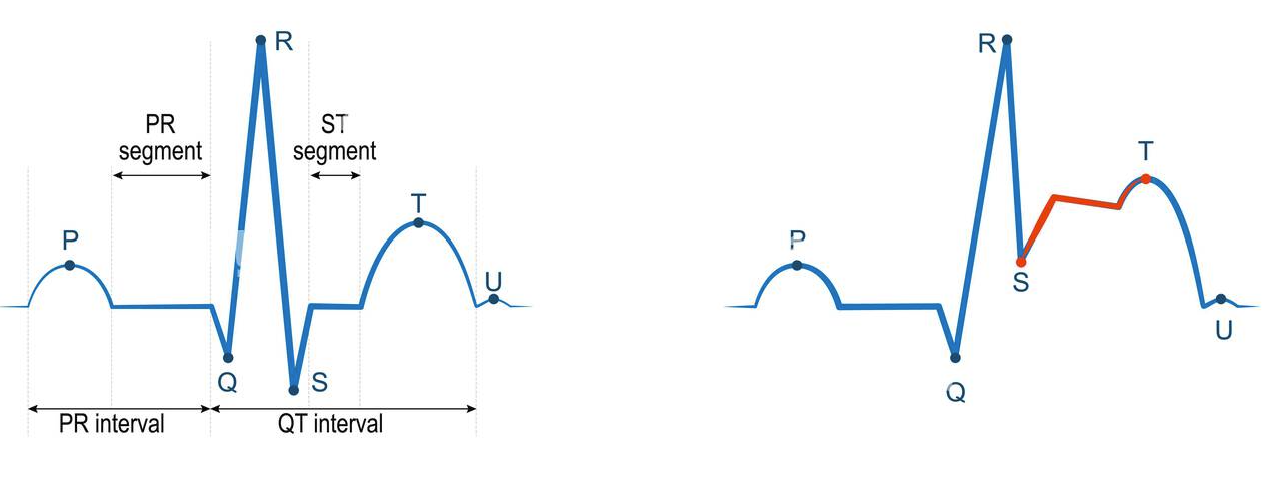

## Heridité et 'target'

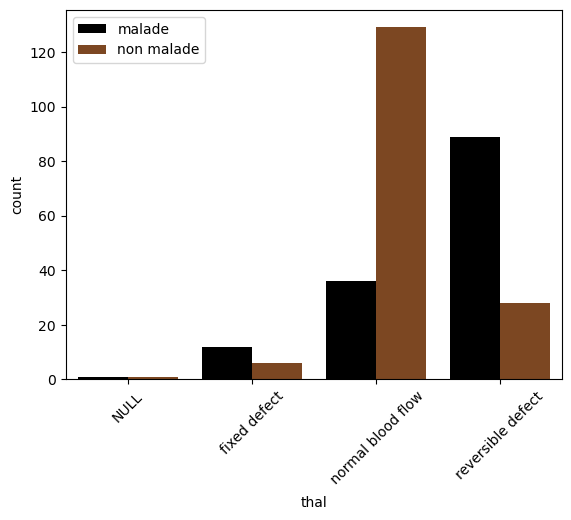

In [24]:
#exang target :
sns.countplot(x="thal",hue = 'target', data=df, palette=['#000000',"#8B4513"])
plt.xticks([0,1,2,3],["NULL", "fixed defect"," normal blood flow", "reversible defect"], rotation = 45)
plt.legend(labels = ['malade','non malade'])
plt.show()

La variable thal désigne Un trouble sanguin appelé thalassémie.
On remarque que chez plus de la moitié des malades cardiaques présentent la thalassémie irrévresible tandis que l plupart des personnes non-malades ont une thalassémie normale (plus de 75%).

- Les thalassémies sont un groupe de maladies héréditaires, L’absorption du fer peut être accrue et des transfusions sanguines fréquentes (qui apportent encore plus de fer) sont nécessaires ; l’excès de fer peut s’accumuler et se déposer dans le muscle cardiaque, ce qui finit par causer un syndrome de surcharge en fer et une insuffisance cardiaque, puis le décès prématuré.

## Conclusion :
- Les maladies cardio-vasculaires sont complexes et multifactorielles.

- Facteurs de risque non modifiable:
       1. Age
       2. Sexe
       3. heredité
    
- Facteurs de risque modifiable:
       1. l’hypertension artérielle
       2. le diabète
       3. l’hypercholestérolémie

- Autre facteurs : alcool, tabac, poids,....

- Prévention secondaire : En modifiant ces facteurs de risque, il est possible de réduire le risque de développer des maladies cardiaques. 
    